# Density of multivariate normal distribution


## I. Formal definition 

Let us consider two-dimensional distrinutions.
Then density assigns probability to small enough regions $\mathcal{R}$:

\begin{align*}
\Pr\left[ x_1^*, x_2^*\gets \mathcal{D}:
\begin{aligned}
  &x_1\leq x_1^*\leq x_1+\Delta x_1\\ 
  &x_2\leq x_2^*\leq x_2+\Delta x_2
\end{aligned}\right]= p(x_1,x_2)\cdot\underbrace{\Delta x_1\Delta x_2}_S +\, \varepsilon
\end{align*}

where $\varepsilon=o(\Delta x_1\cdot\Delta x_2)$ in the process $\Delta x_1\to 0$ and $\Delta x_2\to 0$.

**Remark.** Regions $\mathcal{R}$ do not have to be rectangular as long as:
* The area $S(\mathcal{R})$ of a region can be computed.  
* Probability can be assigned to the region $\mathcal{R}$ and its scalings.

Then $\varepsilon=o(S)$ when we rescale the region $\mathcal{R}$ around the point $(x_1,x_2)$. Here $o(S)$ notation means that $\varepsilon$ starts to decrease faster than $S$ in the process $S\to 0$.


### Example

Let us consider density of standard normal random vector at location $(0,0)$. For that we sample 1000 data points and compute what is the fraction of points in the square $[0,\Delta x]\times [0, \Delta x]$. This is an approximation of real probabilities. 

In [1]:
from scipy.stats import multivariate_normal
from pandas import DataFrame, Series
from plotnine import *

# Local imports
from convenience import *

In [2]:
N = 10000
DX = [0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.5, 0.75, 1.0, 5.0]
X = DataFrame(multivariate_normal.rvs(cov=[[1.0, 0.0], [0.0, 1.0]], size= N))

# Emirical probability estimate
epr = [X.apply(lambda x: 0 <=x[0] and x[0] <= dx and 0 <= x[1] and x[1] <= dx, axis=1).mean() for dx in DX]

# Density at point (0, 0)
p = multivariate_normal.pdf([0,0], cov=[[1.0, 0.0], [0.0, 1.0]])
apr = [p * dx *dx for dx in DX]


# Approximation quality
df = (DataFrame({'dx': DX, 'epr': epr, 'apr': apr})
      .assign(epsilon=lambda df: abs(df['apr'] - df['epr']))
      .assign(S=lambda df: df['dx'] *  df['dx'])
      .assign(relative_error=lambda df: df['epsilon']/df['S']))

display(head(df))

,dx,epr,apr,epsilon,S,relative_error
0,0.06,0.0004,0.000573,0.000173,0.0036,0.048044
1,0.08,0.0009,0.001019,0.000119,0.0064,0.018530
2,0.10,0.0016,0.001592,0.000008,0.0100,0.000845
3,0.12,0.0023,0.002292,0.000008,0.0144,0.000567
4,0.14,0.0026,0.003119,0.000519,0.0196,0.026502


In [3]:
df

,dx,epr,apr,epsilon,S,relative_error
0,0.06,0.0004,0.000573,0.000173,0.0036,0.048044
1,0.08,0.0009,0.001019,0.000119,0.0064,0.018530
2,0.10,0.0016,0.001592,0.000008,0.0100,0.000845
3,0.12,0.0023,0.002292,0.000008,0.0144,0.000567
4,0.14,0.0026,0.003119,0.000519,0.0196,0.026502
5,0.16,0.0038,0.004074,0.000274,0.0256,0.010717
6,0.18,0.0052,0.005157,0.000043,0.0324,0.001339
7,0.20,0.0062,0.006366,0.000166,0.0400,0.004155
8,0.25,0.0096,0.009947,0.000347,0.0625,0.005555
9,0.50,0.0354,0.039789,0.004389,0.2500,0.017555


As you can see the approximation error $\varepsilon$ decreases faster than $S$ until $\Delta x\approx 0.5$ and after that $\varepsilon$ starts to grow agan. This is the artefact of finite sampling. If we would perfectly compute the probability then the downward trend would continue. 

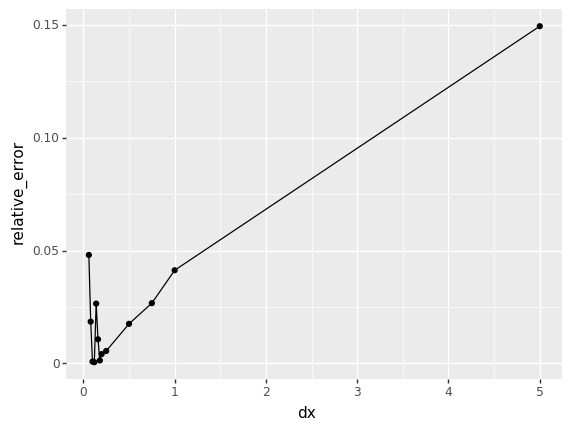

<ggplot: (-9223372036552862306)>

In [4]:
p = ggplot(df) 
p = p + geom_line(aes(x = 'dx', y = 'relative_error')) 
p = p + geom_point(aes(x = 'dx', y = 'relative_error'))
display(p)

## II. Density recalibration for normal distribution

**Relation between densities.** Recall that affine transformation changes a square grid into parallelograms.

<table>
    <tr>
        <td>
            <img src = 'illustrations/original-grid.png' width=50%>
        </td>
        <td>
            $\quad\xrightarrow{\boldsymbol{y}=A\boldsymbol{x}+\boldsymbol{\mu}}\quad$
        </td>
        <td>
            <img src = 'illustrations/transformed-grid.png' width=50%>
        </td>
     <tr>
</table>


As a result, the area of the regions is different on the left and on the right:
\begin{align*}
p(x_1,x_2)\cdot S_1\approx q(y_1,y_2)\cdot S_2\qquad\Longrightarrow\qquad q(y_1,y_2)={\frac{S_1}{S_2}}\cdot p(x_1,x_2) 
\end{align*}
Fortunately, the ratio between areas are constant over the entire plane!



**Actual derivation.**
Let $\boldsymbol{x}$ be a sample from standard normal distribution and $\boldsymbol{y}=A\boldsymbol{x}+\boldsymbol{\mu}$ the sample from a resulting distribution.
The density of $(x_1,x_2)$ pairs can be computed based on independence:

\begin{align*}
p(x_1,x_2)=p(x_1)\cdot p(x_2)=\frac{1}{2\pi}\cdot\mathsf{exp}\Biggl(-\frac{x_1^2+x_2^2}{2}\Biggl)\enspace.
\end{align*}

To estimate density $q(y_1,y_2)$ for pairs $(y_1,y_2)$, we must find the corresponding $(x_1,x_2)$:

\begin{align*}
 \boldsymbol{y}=A\boldsymbol{x}+\boldsymbol{\mu}\quad\Leftrightarrow\quad \boldsymbol{x}=A^{-1}(\boldsymbol{y}-\boldsymbol{\mu})\enspace. 
\end{align*}

Thus we get 

\begin{align*}
q(y_1,y_2)&=\frac{S_1}{S_2}\cdot\frac{1}{2\pi}\cdot
\exp{-\frac{(\boldsymbol{y}-\boldsymbol{\mu})^T A^{-T}A^{-1}(\boldsymbol{y}-\boldsymbol{\mu})}{2}}\\
&=\frac{1}{\sqrt{\det(\Sigma)}}\cdot\frac{1}{2\pi}\cdot
\exp{-\frac{(\boldsymbol{y}-\boldsymbol{\mu})^T \Sigma^{-1}(\boldsymbol{y}-\boldsymbol{\mu})}{2}}\enspace
\end{align*}

where $\sqrt{\det(\Sigma)}$ comes from the fact $\Sigma=A A^{T}$. Indeed, if  we take unit square $[0, 1]\times [0,1]$ then its image has area $det(A)$ and thus

\begin{align*}
\frac{S_1}{S_2}=\frac{1}{|det(A)|}=\frac{1}{\sqrt{det(A)\cdot\det(A)}}=\frac{1}{\sqrt{det(\Sigma)}}\enspace.
\end{align*}


### Example

Let us consider density of standard normal random vector at region $[0, 1]\time[0,1]$ . For that we sample 2000 data points and see how these points are altered by an affine transformation. 

In [5]:
N = 2000
dx= 1
# Specification of affine transformation
mu = Series({'y1': 1, 'y2': -1})
display(mu)
A = (DataFrame([[1, 1], [1, -1]])
     .rename(index={0: 'x1', 1: 'x2'})
     .rename(columns={0: 'y1', 1: 'y2'}))
display(A)


# Standard normal distribution and its transformation
df = (DataFrame(multivariate_normal.rvs(cov=[[1.0, 0.0], [0.0, 1.0]], size= N))
     .rename(columns={0: 'x1', 1: 'x2'})
     .assign(selected=lambda df: df.apply(lambda x: 0 <=x[0] and x[0] <= dx and 0 <= x[1] and x[1] <= dx, axis=1))
     .assign(y1 = lambda df: df[['x1', 'x2']].dot(A['y1']) + mu['y1'])
     .assign(y2 = lambda df: df[['x1', 'x2']].dot(A['y2']) + mu['y2'])
    )

display(head(df))

y1    1
y2   -1
dtype: int64

,y1,y2
x1,1,1
x2,1,-1


,x1,x2,selected,y1,y2
0,-2.020853,-0.775562,False,-1.796415,-2.245291
1,0.976030,-1.799564,False,0.176466,1.775594
2,-0.323131,-1.083494,False,-0.406625,-0.239638
3,-0.758092,0.108756,False,0.350665,-1.866848
4,0.390392,0.385859,True,1.776250,-0.995467


Note that the area of the region doubles as $det(A)=-2$.

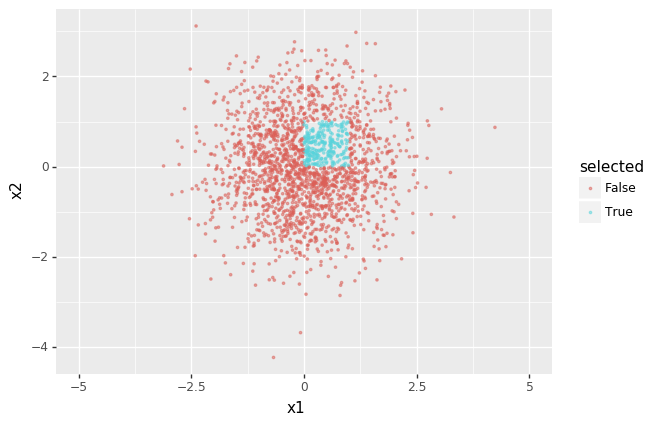

<ggplot: (-9223372036550652451)>

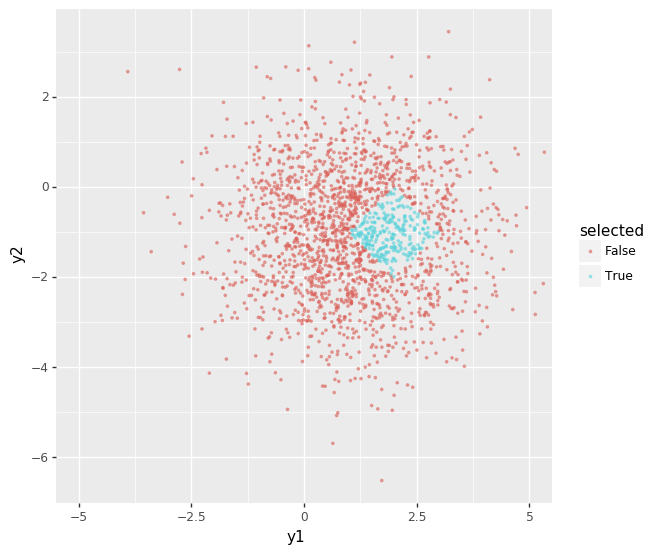

<ggplot: (301905044)>

In [6]:
p = ggplot(df) 
p = p + geom_point(aes(x = 'x1', y = 'x2', color = 'selected'), alpha=0.5, size=0.5)
p = p + coord_fixed(ratio=1, xlim=[-5, 5])
display(p)
p = ggplot(df) 
p = p + geom_point(aes(x = 'y1', y = 'y2', color = 'selected'), alpha=0.5, size=0.5)
p = p + coord_fixed(ratio=1, xlim=[-5, 5])
display(p)

In [6]:
%config IPCompleter.greedy=True